<div class="alert alert-block alert-info">
    <h1><strong> Prima Indians Diabetes Dataset </strong></h1>
    <strong> Supervised Learning (Sec. 001) </strong></br>
    
 - Bruno Morgado
</div>

`Fields description:`
- preg = Number of times pregnant
- plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- pres = Diastolic blood pressure (mm Hg)
- skin = Triceps skin fold thickness (mm)
- test = 2-Hour serum insulin (mu U/ml)
- mass = Body mass index (weight in kg/(height in m)^2)
- pedi = Diabetes pedigree function
- age = Age (years)
- class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score, ShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.impute import SimpleImputer
import joblib
import dill

In [2]:
columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df_bruno = pd.read_csv('pima_indians_diabetes.csv', names = columns)

In [3]:
df_bruno.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_bruno.tail()

,preg,plas,pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df_bruno.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [6]:
df_bruno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df_bruno.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df_bruno.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

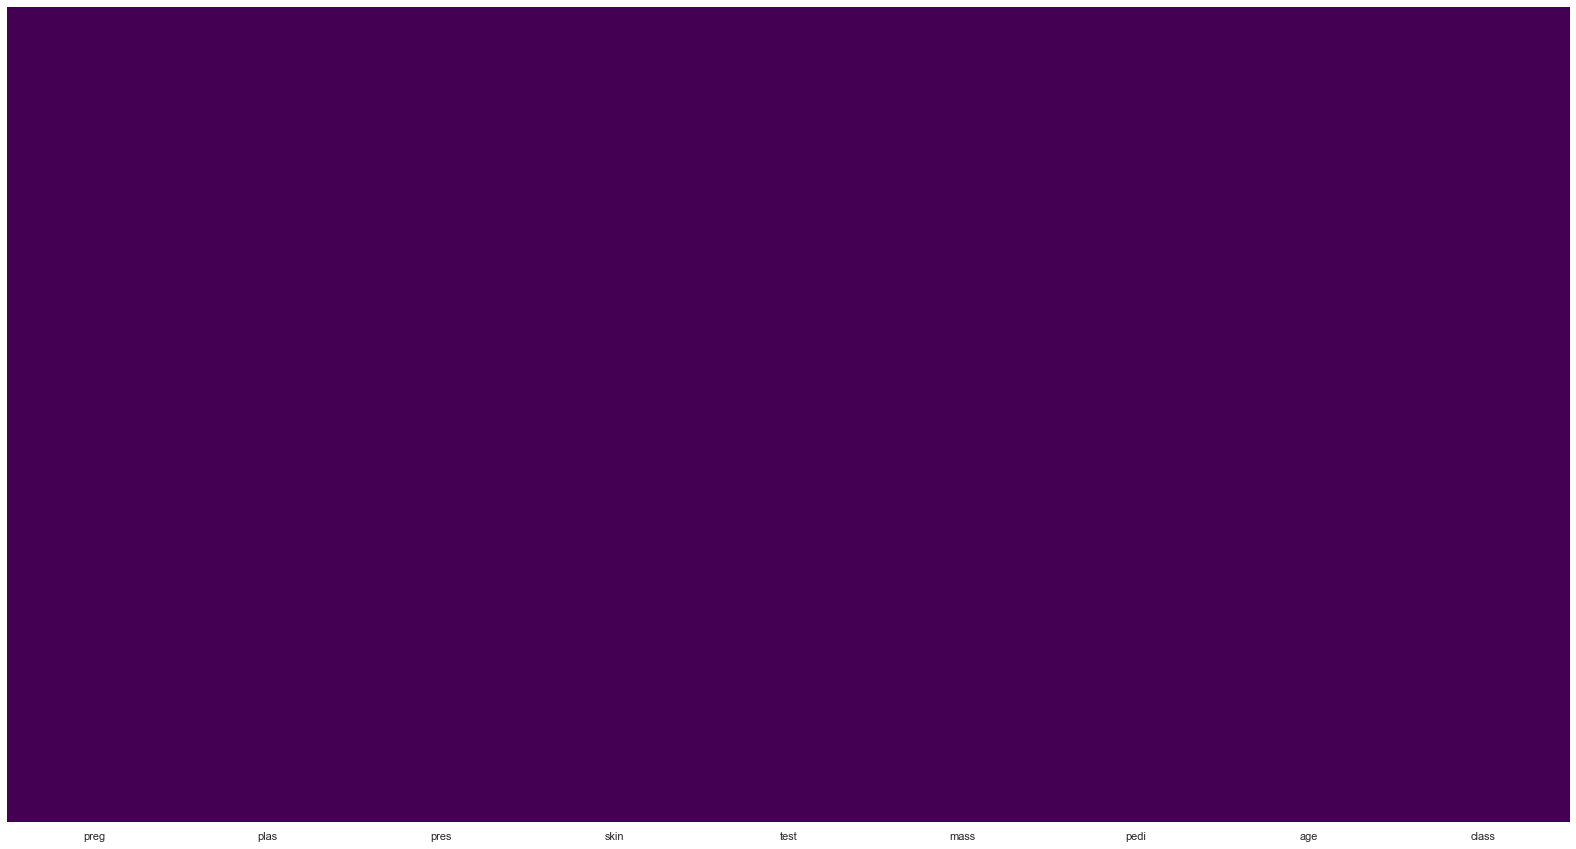

In [9]:
sns.set(rc={"figure.figsize": (28,15)})
sns.heatmap(df_bruno.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

#### Features with with unaccceptable 0 (zero) values

In [10]:
# Identify columns with zeros
df_bruno.drop('class', axis = 1).eq(0).any()

preg     True
plas     True
pres     True
skin     True
test     True
mass     True
pedi    False
age     False
dtype: bool

In [11]:
zero_unacceptable = ['plas', 'pres', 'skin', 'test', 'mass']
for col in zero_unacceptable:
    df_bruno[col].replace(0, np.nan, inplace=True)

In [12]:
df_bruno.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


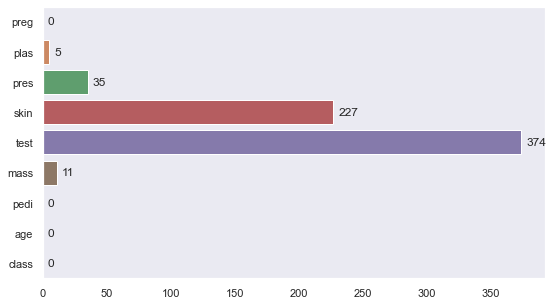

In [13]:
# Visualizing Null Values
plt.figure(figsize=(9,5))
ax = sns.barplot(x=df_bruno.isna().sum(),
                y=df_bruno.columns, orient='h')
for p in ax.patches:
    ax.annotate(text=f"{p.get_width():.0f}",
               xy=(p.get_width(), p.get_y()+p.get_height()/2),
               xytext=(5, 0), textcoords='offset points',
               ha="left", va="center")
plt.grid(False)
plt.show()

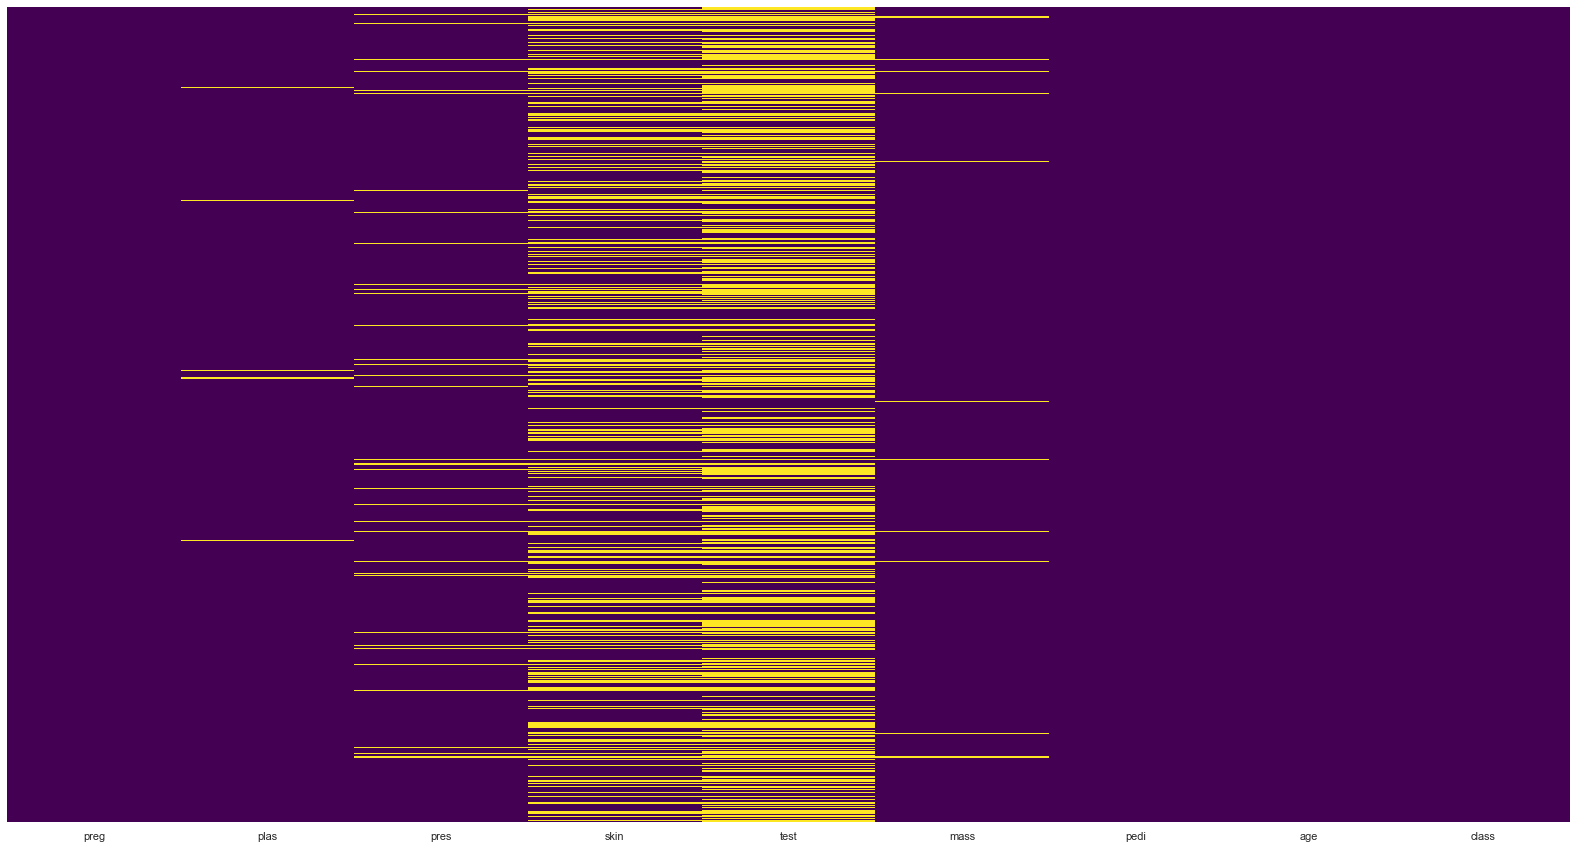

In [14]:
sns.set(rc={"figure.figsize": (28,15)})
sns.heatmap(df_bruno.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

#### Impute median in null-value cells

In [15]:
imputer = SimpleImputer(strategy='mean')

In [16]:
df_bruno[['plas', 'pres', 'skin', 'test', 'mass']] = imputer.fit_transform(df_bruno[['plas', 'pres', 'skin', 'test', 'mass']])

In [17]:
df_bruno.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
df_bruno['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [19]:
proportion = df_bruno['class'].value_counts()/len(df_bruno['class'])

In [20]:
proportion

0    0.651042
1    0.348958
Name: class, dtype: float64

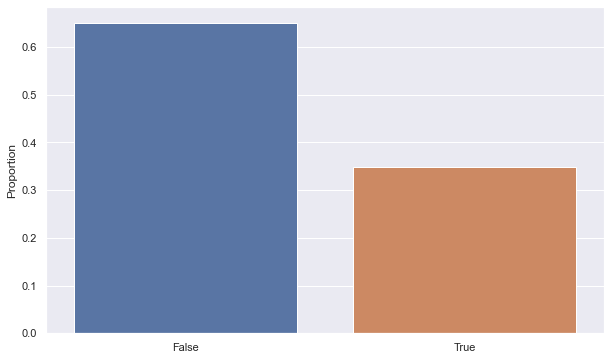

In [21]:
# Check for imbalanced target variables
plt.figure(figsize = (10,6))
sns.barplot(x = [0, 1], y = proportion)
plt.xticks(np.arange(2),('False', 'True'))
plt.ylabel('Proportion')
plt.show()

In [22]:
transformer_bruno = StandardScaler()

In [23]:
#df_features = transformer_bruno.fit_transform(df_bruno.drop('class', axis = 1))

In [24]:
df_features = df_bruno.drop('class', axis = 1)

In [25]:
df_target = df_bruno['class']

In [26]:
df_features.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [27]:
df_target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: int64

In [28]:
X_train_bruno, X_test_bruno, y_train_bruno, y_test_bruno = train_test_split(df_features, df_target, test_size=0.3, random_state=42)

In [29]:
X_train_bruno_tr = transformer_bruno.fit_transform(X_train_bruno)

In [30]:
X_test_bruno_tr = transformer_bruno.transform(X_test_bruno)

## Oversample the minority class (1: Positive For Diabetes)

In [31]:
def upsample_SMOTE(X_train, y_train, ratio=1.0):
    """Upsamples minority class using SMOTE.
    Ratio argument is the percentage of the upsampled minority class in relation
    to the majority class. Default is 1.0
    """
    sm = SMOTE(random_state=42, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm

In [32]:
# Concatenate training data back together
concat_train = pd.concat([X_train_bruno, y_train_bruno], axis = 1)

In [33]:
concat_train.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
334,1,95.0,60.0,18.0,58.0,23.9,0.260,22,0
139,5,105.0,72.0,29.0,325.0,36.9,0.159,28,0
485,0,135.0,68.0,42.0,250.0,42.3,0.365,24,1
547,4,131.0,68.0,21.0,166.0,33.1,0.160,28,0
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0


In [34]:
proportion_train = concat_train['class'].value_counts()/len(concat_train['class'])

In [35]:
proportion_train

0    0.649907
1    0.350093
Name: class, dtype: float64

In [36]:
X_train_bruno_sm, y_train_bruno_sm = upsample_SMOTE(X_train_bruno, y_train_bruno, .80) 

628 628


In [37]:
unique, count = np.unique(y_train_bruno_sm, return_counts=True)

In [38]:
print(np.c_[unique, count])

[[  0 349]
 [  1 279]]


In [39]:
X_train_bruno_sm_tr = transformer_bruno.fit_transform(X_train_bruno_sm)

## Instantiate classifiers

In [40]:
lr_M = LogisticRegression(max_iter=1400)
rf_M = RandomForestClassifier()
svc_M = SVC()
dt_M = DecisionTreeClassifier(criterion='entropy', max_depth=42)
etc_M = ExtraTreesClassifier()

### Hard voting

In [41]:
voting_hard = VotingClassifier(
                    estimators=[
                        ('logistic_reg', lr_M),
                        ('random_forest', rf_M),
                        ('svc', svc_M),
                        ('decision_trees', dt_M),
                        ('extra_trees', etc_M)
                        ],
                    voting = 'hard',
                    n_jobs = -1)

In [42]:
classifiers = [lr_M, rf_M, svc_M, dt_M, etc_M, voting_hard]
predictions = pd.DataFrame(columns=['Logistic_Regression',
                                  'Random_Forest',
                                  'SVC',
                                  'Decision_Trees',
                                  'Extra_Trees',
                                  'Voting_Classifier'])
for count, clf in enumerate(classifiers):
#     print(count, clf)
    clf.fit(X_train_bruno_sm_tr, y_train_bruno_sm)
    predictions[predictions.columns[count]] = clf.predict(X_test_bruno_tr[:3])

In [43]:
predictions['class'] = y_test_bruno.reset_index(drop=True)

In [44]:
predictions

,Logistic_Regression,Random_Forest,SVC,Decision_Trees,Extra_Trees,Voting_Classifier,class
0,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0


### Soft Voting

In [45]:
lr_soft_M = LogisticRegression(max_iter = 1400)
rf_soft_M = RandomForestClassifier()
svc_soft_M = SVC(probability = True)
dt_soft_M = DecisionTreeClassifier(criterion='entropy', max_depth=42)
etc_soft_M = ExtraTreesClassifier()

In [46]:
voting_soft = VotingClassifier(
                    estimators=[
                        ('logistic_reg_soft', lr_soft_M),
                        ('random_forest_soft', rf_soft_M),
                        ('svc_soft', svc_soft_M),
                        ('decision_trees_soft', dt_soft_M),
                        ('extra_trees_soft', etc_soft_M)
                        ],
                    voting = 'soft',
                    n_jobs = -1)

In [47]:
classifiers_soft = [lr_soft_M, rf_soft_M, svc_soft_M, dt_soft_M, etc_soft_M, voting_soft]
predictions_soft = pd.DataFrame(columns=['Logistic_Regression',
                                  'Random_Forest',
                                  'SVC',
                                  'Decision_Trees',
                                  'Extra_Trees',
                                  'Voting_Classifier'])
for count, clf in enumerate(classifiers_soft):
#     print(count, clf)
    clf.fit(X_train_bruno_sm_tr, y_train_bruno_sm)
    predictions_soft[predictions_soft.columns[count]] = clf.predict(X_test_bruno_tr[:3])
predictions_soft['class'] = y_test_bruno.reset_index(drop=True)

In [48]:
predictions_soft

,Logistic_Regression,Random_Forest,SVC,Decision_Trees,Extra_Trees,Voting_Classifier,class
0,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0


##  Extra Trees and Decision Trees

In [49]:
pipeline1_bruno = Pipeline([
    ('tranformer', transformer_bruno),
    ('extra_trees', etc_M)
    ])

In [50]:
pipeline2_bruno = Pipeline([
    ('tranformer', transformer_bruno),
    ('decision_trees', dt_M)
    ])

In [51]:
pipeline1_bruno.fit(X_train_bruno, y_train_bruno)

Pipeline(steps=[('tranformer', StandardScaler()),
                ('extra_trees', ExtraTreesClassifier())])

In [52]:
pipeline2_bruno.fit(X_train_bruno, y_train_bruno)

Pipeline(steps=[('tranformer', StandardScaler()),
                ('decision_trees',
                 DecisionTreeClassifier(criterion='entropy', max_depth=42))])

In [53]:
cv = ShuffleSplit(n_splits=10, random_state=42)

### Scores Pipeline 1

#### Cross Validation with original training data

In [54]:
scores_pipe1_1 = cross_val_score(pipeline1_bruno,
                               X_train_bruno,
                               y_train_bruno,
                               cv = cv,
                               n_jobs=-1,
                              verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished


In [55]:
scores_pipe1_1

array([0.7962963 , 0.77777778, 0.75925926, 0.81481481, 0.75925926,
       0.81481481, 0.7037037 , 0.75925926, 0.83333333, 0.81481481])

In [56]:
print(f'Average scores original data: {round(scores_pipe1_1.mean(),2)}')

Average scores original data: 0.78


#### Cross Validation with upsampled training data

In [57]:
pipeline1_bruno.fit(X_train_bruno_sm, y_train_bruno_sm)

Pipeline(steps=[('tranformer', StandardScaler()),
                ('extra_trees', ExtraTreesClassifier())])

In [58]:
scores_pipe1_2 = cross_val_score(pipeline1_bruno,
                               X_train_bruno_sm,
                               y_train_bruno_sm,
                               cv = cv,
                               n_jobs=-1,
                              verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [59]:
scores_pipe1_2

array([0.82539683, 0.87301587, 0.77777778, 0.77777778, 0.80952381,
       0.79365079, 0.79365079, 0.92063492, 0.85714286, 0.84126984])

In [60]:
print(f'Average scores upasampled data: {round(scores_pipe1_2.mean(),2)}')

Average scores upasampled data: 0.83


### Scores Pipeline 2

#### Cross Validation with original training data

In [61]:
scores_pipe2_1 = cross_val_score(pipeline2_bruno,
                                X_train_bruno,
                                y_train_bruno,
                                cv = cv,
                                n_jobs=-1,
                                verbose=1) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [62]:
print(f'Average scores original data: {round(scores_pipe2_1.mean(),2)}')

Average scores original data: 0.76


In [63]:
pipeline2_bruno.fit(X_train_bruno_sm, y_train_bruno_sm)

Pipeline(steps=[('tranformer', StandardScaler()),
                ('decision_trees',
                 DecisionTreeClassifier(criterion='entropy', max_depth=42))])

#### Cross Validation with upsampled training data

In [64]:
scores_pipe2_2 = cross_val_score(pipeline2_bruno,
                                X_train_bruno_sm,
                                y_train_bruno_sm,
                                cv = cv,
                                n_jobs=-1,
                                verbose=1) 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [65]:
print(f'Average scores upsampled data: {round(scores_pipe2_2.mean(),2)}')

Average scores upsampled data: 0.75


#### Predictions Pipeline 1

In [66]:
pred_pipe1 = pipeline1_bruno.predict(X_test_bruno)

In [67]:
cm1 = confusion_matrix(y_test_bruno, pred_pipe1, labels=pipeline1_bruno.classes_)

In [68]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                               display_labels=pipeline1_bruno.classes_)

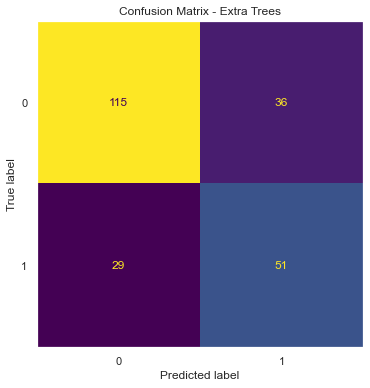

In [69]:
fig, ax = plt.subplots(figsize=(6,6))
disp1.plot(ax=ax ,colorbar=False)
plt.grid(False)
plt.title('Confusion Matrix - Extra Trees')
plt.show()

In [70]:
# Print the classification report
print('\t\tClassification Report - Extra Trees\n\n', classification_report(y_test_bruno, pred_pipe1))

		Classification Report - Extra Trees

               precision    recall  f1-score   support

           0       0.80      0.76      0.78       151
           1       0.59      0.64      0.61        80

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.73      0.72      0.72       231



precision means what percentage of the positive predictions made were actually correct.</br> 
`TP/(TP+FP)`
 
Recall in simple terms means, what percentage of actual positive predictions were correctly classified by the classifier.</br> 
`TP/(TP+FN)`

F1 score can also be described as the harmonic mean or weighted average of precision and recall.</br> 
`2x((precision x recall) / (precision + recall))`

#### Predictions Pipeline 2

In [71]:
pred_pipe2 = pipeline2_bruno.predict(X_test_bruno)

In [72]:
cm2 = confusion_matrix(y_test_bruno, pred_pipe2, labels=pipeline2_bruno.classes_)

In [73]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=pipeline2_bruno.classes_)

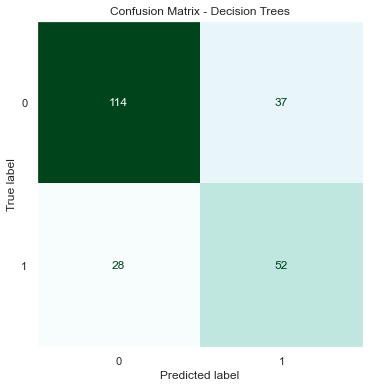

In [74]:
fig, ax = plt.subplots(figsize=(6,6))
disp2.plot(ax=ax ,colorbar=False, cmap='BuGn')
plt.grid(False)
plt.title('Confusion Matrix - Decision Trees')
plt.show()

In [75]:
# Print the classification report
print('\t\tClassification Report - Decision Trees\n\n', classification_report(y_test_bruno, pred_pipe2))

		Classification Report - Decision Trees

               precision    recall  f1-score   support

           0       0.80      0.75      0.78       151
           1       0.58      0.65      0.62        80

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.73      0.72      0.72       231



precision means what percentage of the positive predictions made were actually correct.</br> 
`TP/(TP+FP)`
 
Recall in simple terms means, what percentage of actual positive predictions were correctly classified by the classifier.</br> 
`TP/(TP+FN)`

F1 score can also be described as the harmonic mean or weighted average of precision and recall.</br> 
`2x((precision x recall) / (precision + recall))`

### Randomized GridSearch

#### Extra Trees

In [76]:
pipeline1_bruno_v2 = Pipeline([
    ('tranformer', transformer_bruno),
    ('extra_trees', etc_M)
    ])

In [77]:
joblib.dump(pipeline1_bruno_v2, "pipeline_extra_trees.pkl")

['pipeline_extra_trees.pkl']

In [78]:
parameters={'extra_trees__n_estimators' : range(10,3000,20),
            'extra_trees__max_depth': range(1,1000,2)}

In [79]:
rand_gridsearch_bruno = RandomizedSearchCV(estimator = pipeline1_bruno_v2,
                                       param_distributions = parameters,
                                       scoring = 'accuracy',
                                       cv = 5,
                                       n_iter = 50,
                                       refit = True,
                                       n_jobs = -1,
                                       verbose = 3,
                                       random_state = 42)

In [80]:
rand_gridsearch_bruno.fit(X_train_bruno_sm, y_train_bruno_sm)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tranformer', StandardScaler()),
                                             ('extra_trees',
                                              ExtraTreesClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'extra_trees__max_depth': range(1, 1000, 2),
                                        'extra_trees__n_estimators': range(10, 3000, 20)},
                   random_state=42, scoring='accuracy', verbose=3)

In [81]:
# Best hyperparameters
print("tuned hpyerparameters :(best parameters) \n", rand_gridsearch_bruno.best_params_)

tuned hpyerparameters :(best parameters) 
 {'extra_trees__n_estimators': 2890, 'extra_trees__max_depth': 495}


In [82]:
# Store the best model
best_model = rand_gridsearch_bruno.best_estimator_

In [83]:
joblib.dump(best_model, 'best_model_extra_trees.pkl')

['best_model_extra_trees.pkl']

In [84]:
# Make new predictions with the tuned model
final_pred = best_model.predict(X_test_bruno)

In [85]:
best_model.score(X_test_bruno, y_test_bruno)

0.7445887445887446

In [86]:
cm3 = confusion_matrix(y_test_bruno, final_pred, labels=pipeline1_bruno.classes_)

In [87]:
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3,
                               display_labels=pipeline1_bruno.classes_)

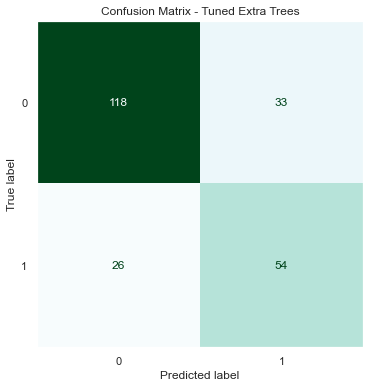

In [88]:
fig, ax = plt.subplots(figsize=(6,6))
disp3.plot(ax=ax ,colorbar=False, cmap='BuGn')
plt.grid(False)
plt.title('Confusion Matrix - Tuned Extra Trees')
plt.show()

In [89]:
# Print the classification report
print('\t\tClassification Report - Tuned Extra Trees\n\n', classification_report(y_test_bruno, final_pred))

		Classification Report - Tuned Extra Trees

               precision    recall  f1-score   support

           0       0.82      0.78      0.80       151
           1       0.62      0.68      0.65        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



### Experimenting with SVC

In [90]:
svc = SVC()

In [91]:
pipeline1_svc = Pipeline([
    ('tranformer', transformer_bruno),
    ('svc', svc)
    ])

In [92]:
# Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
param_grid = {'svc__kernel': ['linear', 'rbf', 'poly'],
              'svc__C': [0.01, 0.1, 1, 10, 100],
              'svc__gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
              'svc__degree': [2, 3]}

In [93]:
rand_gridsearch_svc = RandomizedSearchCV(estimator = pipeline1_svc,
                                       param_distributions = param_grid,
                                       scoring = 'accuracy',
                                       cv = 5,
                                       n_iter = 50,
                                       refit = True,
                                       n_jobs = -1,
                                       verbose = 3,
                                       random_state = 42)

In [94]:
rand_gridsearch_svc.fit(X_train_bruno_sm, y_train_bruno_sm)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 5/5] END extra_trees__max_depth=211, extra_trees__n_estimators=910;, score=0.872 total time=   3.0s
[CV 2/5] END extra_trees__max_depth=731, extra_trees__n_estimators=2730;, score=0.817 total time=   9.0s
[CV 1/5] END extra_trees__max_depth=495, extra_trees__n_estimators=2890;, score=0.889 total time=   9.6s
[CV 2/5] END extra_trees__max_depth=803, extra_trees__n_estimators=2270;, score=0.810 total time=   8.0s
[CV 5/5] END extra_trees__max_depth=213, extra_trees__n_estimators=2470;, score=0.856 total time=   8.5s
[CV 4/5] END extra_trees__max_depth=897, extra_trees__n_estimators=430;, score=0.872 total time=   3.2s
[CV 3/5] END extra_trees__max_depth=865, extra_trees__n_estimators=410;, score=0.762 total time=   2.2s
[CV 2/5] END extra_trees__max_depth=11, extra_trees__n_estimators=390;, score=0.810 total time=   1.6s
[CV 3/5] END extra_trees__max_depth=797, extra_trees__n_estimators=710;, score=0.746 total time=   3.1s

[CV 3/5] END extra_trees__max_depth=211, extra_trees__n_estimators=910;, score=0.762 total time=   2.9s
[CV 5/5] END extra_trees__max_depth=11, extra_trees__n_estimators=2210;, score=0.832 total time=   6.6s
[CV 3/5] END extra_trees__max_depth=83, extra_trees__n_estimators=2310;, score=0.770 total time=   7.8s
[CV 1/5] END extra_trees__max_depth=589, extra_trees__n_estimators=630;, score=0.865 total time=   2.0s
[CV 2/5] END extra_trees__max_depth=589, extra_trees__n_estimators=630;, score=0.833 total time=   2.1s
[CV 5/5] END extra_trees__max_depth=589, extra_trees__n_estimators=630;, score=0.856 total time=   2.1s
[CV 4/5] END extra_trees__max_depth=803, extra_trees__n_estimators=2270;, score=0.872 total time=   8.1s
[CV 2/5] END extra_trees__max_depth=547, extra_trees__n_estimators=2810;, score=0.802 total time=  12.4s
[CV 3/5] END extra_trees__max_depth=11, extra_trees__n_estimators=390;, score=0.738 total time=   1.4s
[CV 4/5] END extra_trees__max_depth=797, extra_trees__n_estimat

[CV 4/5] END extra_trees__max_depth=211, extra_trees__n_estimators=910;, score=0.872 total time=   3.0s
[CV 3/5] END extra_trees__max_depth=731, extra_trees__n_estimators=2730;, score=0.754 total time=   8.9s
[CV 5/5] END extra_trees__max_depth=83, extra_trees__n_estimators=2310;, score=0.848 total time=   7.7s
[CV 4/5] END extra_trees__max_depth=589, extra_trees__n_estimators=630;, score=0.872 total time=   2.1s
[CV 3/5] END extra_trees__max_depth=803, extra_trees__n_estimators=2270;, score=0.770 total time=   8.0s
[CV 1/5] END extra_trees__max_depth=547, extra_trees__n_estimators=2810;, score=0.881 total time=  10.9s
[CV 2/5] END extra_trees__max_depth=865, extra_trees__n_estimators=410;, score=0.802 total time=   2.4s
[CV 1/5] END extra_trees__max_depth=11, extra_trees__n_estimators=390;, score=0.865 total time=   1.7s
[CV 1/5] END extra_trees__max_depth=797, extra_trees__n_estimators=710;, score=0.897 total time=   3.1s
[CV 4/5] END extra_trees__max_depth=839, extra_trees__n_estima

[CV 1/5] END extra_trees__max_depth=211, extra_trees__n_estimators=910;, score=0.881 total time=   3.0s
[CV 4/5] END extra_trees__max_depth=11, extra_trees__n_estimators=2210;, score=0.816 total time=   6.6s
[CV 2/5] END extra_trees__max_depth=83, extra_trees__n_estimators=2310;, score=0.817 total time=   7.8s
[CV 5/5] END extra_trees__max_depth=495, extra_trees__n_estimators=2890;, score=0.880 total time=   9.9s
[CV 3/5] END extra_trees__max_depth=213, extra_trees__n_estimators=2470;, score=0.770 total time=   8.6s
[CV 1/5] END extra_trees__max_depth=897, extra_trees__n_estimators=430;, score=0.881 total time=   1.4s
[CV 2/5] END extra_trees__max_depth=897, extra_trees__n_estimators=430;, score=0.833 total time=   1.4s
[CV 5/5] END extra_trees__max_depth=897, extra_trees__n_estimators=430;, score=0.856 total time=   3.5s
[CV 4/5] END extra_trees__max_depth=865, extra_trees__n_estimators=410;, score=0.872 total time=   2.2s
[CV 4/5] END extra_trees__max_depth=11, extra_trees__n_estimat

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tranformer', StandardScaler()),
                                             ('svc', SVC())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'svc__C': [0.01, 0.1, 1, 10, 100],
                                        'svc__degree': [2, 3],
                                        'svc__gamma': [0.01, 0.03, 0.1, 0.3,
                                                       1.0, 3.0],
                                        'svc__kernel': ['linear', 'rbf',
                                                        'poly']},
                   random_state=42, scoring='accuracy', verbose=3)

In [95]:
# Best hyperparameters
print("tuned hpyerparameters :(best parameters) \n", rand_gridsearch_svc.best_params_)

tuned hpyerparameters :(best parameters) 
 {'svc__kernel': 'rbf', 'svc__gamma': 0.3, 'svc__degree': 2, 'svc__C': 10}


In [96]:
# Store the best model
best_model_svc = rand_gridsearch_svc.best_estimator_

In [97]:
# Make new predictions with the tuned model
svc_pred = best_model_svc.predict(X_test_bruno)

In [98]:
best_model_svc.score(X_test_bruno, y_test_bruno)

0.6666666666666666

In [99]:
# Print the classification report
print('\t\tClassification Report - Tuned SVC\n\n', classification_report(y_test_bruno, svc_pred))

		Classification Report - Tuned SVC

               precision    recall  f1-score   support

           0       0.75      0.74      0.74       151
           1       0.52      0.54      0.53        80

    accuracy                           0.67       231
   macro avg       0.63      0.64      0.64       231
weighted avg       0.67      0.67      0.67       231



### Experimenting with Logistic Regression

In [100]:
log = LogisticRegression()

In [101]:
pipeline1_log = Pipeline([
    ('tranformer', transformer_bruno),
    ('log', log)
    ])

In [102]:
# Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
param_grid_log = {'log__penalty': ['l1', 'l2', 'elasticnet'],
                  'log__C': [0.01, 0.1, 1, 10, 100],
                  'log__solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']}

In [103]:
rand_gridsearch_log = RandomizedSearchCV(estimator = pipeline1_log,
                                       param_distributions = param_grid_log,
                                       scoring = 'accuracy',
                                       cv = 5,
                                       n_iter = 50,
                                       refit = True,
                                       n_jobs = -1,
                                       verbose = 3,
                                       random_state = 42)

In [104]:
rand_gridsearch_log.fit(X_train_bruno_sm, y_train_bruno_sm)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Assignments/Assignment4/BrunoMorgado_EnsembleLearning/conda-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/brunomorgado/Dropbox/Bruno_Morgado/Education/Mac_Education/Centennial_College/Fourth_Semester/Supervised_learning/Assignments/Assignment4/BrunoMorgado_EnsembleLearning/conda-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fi

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tranformer', StandardScaler()),
                                             ('log', LogisticRegression())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'log__C': [0.01, 0.1, 1, 10, 100],
                                        'log__penalty': ['l1', 'l2',
                                                         'elasticnet'],
                                        'log__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear', 'saga']},
                   random_state=42, scoring='accuracy', verbose=3)

In [105]:
# Best hyperparameters
print("tuned hpyerparameters :(best parameters) \n", rand_gridsearch_log.best_params_)

tuned hpyerparameters :(best parameters) 
 {'log__solver': 'liblinear', 'log__penalty': 'l2', 'log__C': 100}


In [106]:
# Store the best model
best_model_log = rand_gridsearch_log.best_estimator_

In [107]:
# Make new predictions with the tuned model
log_pred = best_model_log.predict(X_test_bruno)

In [108]:
best_model_log.score(X_test_bruno, y_test_bruno)

0.7186147186147186

In [109]:
# Print the classification report
print('\t\tClassification Report - Tuned Logistic Regression\n\n', classification_report(y_test_bruno, log_pred))

		Classification Report - Tuned Logistic Regression

               precision    recall  f1-score   support

           0       0.80      0.76      0.78       151
           1       0.59      0.64      0.61        80

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.73      0.72      0.72       231



In [110]:
dill.dump_session('notebook_session.db')

[CV 3/5] END extra_trees__max_depth=11, extra_trees__n_estimators=2210;, score=0.746 total time=   6.5s
[CV 4/5] END extra_trees__max_depth=731, extra_trees__n_estimators=2730;, score=0.872 total time=   9.2s
[CV 3/5] END extra_trees__max_depth=495, extra_trees__n_estimators=2890;, score=0.770 total time=   9.5s
[CV 1/5] END extra_trees__max_depth=213, extra_trees__n_estimators=2470;, score=0.873 total time=   8.9s
[CV 4/5] END extra_trees__max_depth=547, extra_trees__n_estimators=2810;, score=0.872 total time=  13.0s
[CV 2/5] END extra_trees__max_depth=839, extra_trees__n_estimators=2110;, score=0.817 total time=  11.3s
[CV 5/5] END extra_trees__max_depth=865, extra_trees__n_estimators=2510;, score=0.864 total time=  17.5s
[CV 3/5] END extra_trees__max_depth=959, extra_trees__n_estimators=1650;, score=0.770 total time=   7.6s
[CV 1/5] END extra_trees__max_depth=37, extra_trees__n_estimators=950;, score=0.881 total time=   4.6s
[CV 4/5] END extra_trees__max_depth=37, extra_trees__n_est

[CV 1/5] END extra_trees__max_depth=11, extra_trees__n_estimators=2210;, score=0.865 total time=   6.6s
[CV 1/5] END extra_trees__max_depth=83, extra_trees__n_estimators=2310;, score=0.873 total time=   7.8s
[CV 2/5] END extra_trees__max_depth=495, extra_trees__n_estimators=2890;, score=0.810 total time=   9.5s
[CV 5/5] END extra_trees__max_depth=803, extra_trees__n_estimators=2270;, score=0.856 total time=   8.2s
[CV 3/5] END extra_trees__max_depth=547, extra_trees__n_estimators=2810;, score=0.770 total time=  12.3s
[CV 5/5] END extra_trees__max_depth=11, extra_trees__n_estimators=390;, score=0.832 total time=   1.6s
[CV 1/5] END extra_trees__max_depth=839, extra_trees__n_estimators=2110;, score=0.881 total time=  10.7s
[CV 4/5] END extra_trees__max_depth=865, extra_trees__n_estimators=2510;, score=0.872 total time=  18.0s
[CV 2/5] END extra_trees__max_depth=959, extra_trees__n_estimators=1650;, score=0.817 total time=   7.9s
[CV 5/5] END extra_trees__max_depth=245, extra_trees__n_est

### Experimenting with Random Forest

In [118]:
rf2 = RandomForestClassifier()

In [119]:
pipeline1_rf2 = Pipeline([
    ('tranformer', transformer_bruno),
    ('rf2', rf2)
    ])

In [120]:
# Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
param_grid_rf2 = {'rf2__n_estimators': [100, 150, 200, 300, 400, 500],
                  'rf2__criterion': ['gini', 'entropy', 'log_loss'],
                  'rf2__max_features': ['sqrt', 'log2'],
                  'rf2__max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
                  'rf2__ccp_alpha': [x for x in np.arange(0.0, 0.035, 0.005)]}

In [121]:
rand_gridsearch_rf2 = RandomizedSearchCV(estimator = pipeline1_rf2,
                                       param_distributions = param_grid_rf2,
                                       scoring = 'accuracy',
                                       cv = 5,
                                       n_iter = 50,
                                       refit = True,
                                       n_jobs = -1,
                                       verbose = 3,
                                       random_state = 42)

In [122]:
rand_gridsearch_rf2.fit(X_train_bruno_sm, y_train_bruno_sm)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('tranformer', StandardScaler()),
                                             ('rf2',
                                              RandomForestClassifier())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'rf2__ccp_alpha': [0.0, 0.005, 0.01,
                                                           0.015, 0.02, 0.025,
                                                           0.03, 0.035],
                                        'rf2__criterion': ['gini', 'entropy',
                                                           'log_loss'],
                                        'rf2__max_depth': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90, 100,
                                                           110],
                                        'rf2__max_features': ['sqrt', 'log2'],
                                        'rf2__n_estimators': [100, 150, 200,
                                                              300, 400, 500]},
                   random_state=42, scoring='accuracy', verbose=3)

In [123]:
# Best hyperparameters
print("tuned hpyerparameters :(best parameters) \n", rand_gridsearch_rf2.best_params_)

tuned hpyerparameters :(best parameters) 
 {'rf2__n_estimators': 150, 'rf2__max_features': 'sqrt', 'rf2__max_depth': 30, 'rf2__criterion': 'log_loss', 'rf2__ccp_alpha': 0.0}


In [124]:
# Store the best model
best_model_rf2 = rand_gridsearch_rf2.best_estimator_

In [128]:
joblib.dump(best_model_rf2, 'best_model_random_forest.pkl')

['best_model_random_forest.pkl']

In [125]:
# Make new predictions with the tuned model
rf2_pred = best_model_rf2.predict(X_test_bruno)

In [126]:
best_model_rf2.score(X_test_bruno, y_test_bruno)

0.7532467532467533

In [127]:
# Print the classification report
print('\t\tClassification Report - Tuned Logistic Regression\n\n', classification_report(y_test_bruno, rf2_pred))

		Classification Report - Tuned Logistic Regression

               precision    recall  f1-score   support

           0       0.85      0.75      0.80       151
           1       0.62      0.75      0.68        80

    accuracy                           0.75       231
   macro avg       0.73      0.75      0.74       231
weighted avg       0.77      0.75      0.76       231



In [129]:
dill.dump_session('notebook_session.db')

[CV 1/5] END rf2__ccp_alpha=0.025, rf2__criterion=entropy, rf2__max_depth=40, rf2__max_features=sqrt, rf2__n_estimators=100;, score=0.849 total time=   0.5s
[CV 4/5] END rf2__ccp_alpha=0.01, rf2__criterion=log_loss, rf2__max_depth=60, rf2__max_features=log2, rf2__n_estimators=200;, score=0.792 total time=   0.9s
[CV 5/5] END rf2__ccp_alpha=0.035, rf2__criterion=log_loss, rf2__max_depth=110, rf2__max_features=sqrt, rf2__n_estimators=200;, score=0.816 total time=   0.9s
[CV 3/5] END rf2__ccp_alpha=0.02, rf2__criterion=log_loss, rf2__max_depth=100, rf2__max_features=sqrt, rf2__n_estimators=400;, score=0.746 total time=   1.8s
[CV 1/5] END rf2__ccp_alpha=0.005, rf2__criterion=gini, rf2__max_depth=60, rf2__max_features=sqrt, rf2__n_estimators=150;, score=0.849 total time=   0.7s
[CV 2/5] END rf2__ccp_alpha=0.005, rf2__criterion=gini, rf2__max_depth=60, rf2__max_features=sqrt, rf2__n_estimators=150;, score=0.786 total time=   0.7s
[CV 5/5] END rf2__ccp_alpha=0.035, rf2__criterion=gini, rf2__

[CV 2/5] END rf2__ccp_alpha=0.01, rf2__criterion=log_loss, rf2__max_depth=60, rf2__max_features=log2, rf2__n_estimators=200;, score=0.794 total time=   1.0s
[CV 5/5] END rf2__ccp_alpha=0.0, rf2__criterion=entropy, rf2__max_depth=40, rf2__max_features=sqrt, rf2__n_estimators=200;, score=0.840 total time=   0.9s
[CV 3/5] END rf2__ccp_alpha=0.025, rf2__criterion=entropy, rf2__max_depth=100, rf2__max_features=log2, rf2__n_estimators=300;, score=0.746 total time=   1.6s
[CV 1/5] END rf2__ccp_alpha=0.005, rf2__criterion=gini, rf2__max_depth=20, rf2__max_features=sqrt, rf2__n_estimators=300;, score=0.857 total time=   1.3s
[CV 4/5] END rf2__ccp_alpha=0.005, rf2__criterion=gini, rf2__max_depth=60, rf2__max_features=sqrt, rf2__n_estimators=150;, score=0.784 total time=   0.7s
[CV 2/5] END rf2__ccp_alpha=0.005, rf2__criterion=entropy, rf2__max_depth=70, rf2__max_features=sqrt, rf2__n_estimators=200;, score=0.778 total time=   1.0s
[CV 5/5] END rf2__ccp_alpha=0.025, rf2__criterion=log_loss, rf2__

[CV 3/5] END rf2__ccp_alpha=0.01, rf2__criterion=log_loss, rf2__max_depth=60, rf2__max_features=log2, rf2__n_estimators=200;, score=0.754 total time=   1.0s
[CV 4/5] END rf2__ccp_alpha=0.0, rf2__criterion=entropy, rf2__max_depth=40, rf2__max_features=sqrt, rf2__n_estimators=200;, score=0.864 total time=   0.9s
[CV 2/5] END rf2__ccp_alpha=0.025, rf2__criterion=entropy, rf2__max_depth=100, rf2__max_features=log2, rf2__n_estimators=300;, score=0.762 total time=   1.6s
[CV 5/5] END rf2__ccp_alpha=0.02, rf2__criterion=log_loss, rf2__max_depth=100, rf2__max_features=sqrt, rf2__n_estimators=400;, score=0.832 total time=   1.8s
[CV 2/5] END rf2__ccp_alpha=0.035, rf2__criterion=gini, rf2__max_depth=100, rf2__max_features=sqrt, rf2__n_estimators=150;, score=0.690 total time=   0.7s
[CV 5/5] END rf2__ccp_alpha=0.005, rf2__criterion=entropy, rf2__max_depth=70, rf2__max_features=sqrt, rf2__n_estimators=200;, score=0.848 total time=   0.9s
[CV 3/5] END rf2__ccp_alpha=0.03, rf2__criterion=gini, rf2__

[CV 5/5] END rf2__ccp_alpha=0.025, rf2__criterion=entropy, rf2__max_depth=40, rf2__max_features=sqrt, rf2__n_estimators=100;, score=0.832 total time=   0.5s
[CV 3/5] END rf2__ccp_alpha=0.0, rf2__criterion=entropy, rf2__max_depth=40, rf2__max_features=sqrt, rf2__n_estimators=200;, score=0.762 total time=   0.8s
[CV 3/5] END rf2__ccp_alpha=0.035, rf2__criterion=log_loss, rf2__max_depth=110, rf2__max_features=sqrt, rf2__n_estimators=200;, score=0.722 total time=   0.9s
[CV 5/5] END rf2__ccp_alpha=0.025, rf2__criterion=entropy, rf2__max_depth=100, rf2__max_features=log2, rf2__n_estimators=300;, score=0.832 total time=   1.6s
[CV 3/5] END rf2__ccp_alpha=0.005, rf2__criterion=gini, rf2__max_depth=20, rf2__max_features=sqrt, rf2__n_estimators=300;, score=0.754 total time=   1.3s
[CV 1/5] END rf2__ccp_alpha=0.035, rf2__criterion=gini, rf2__max_depth=100, rf2__max_features=sqrt, rf2__n_estimators=150;, score=0.841 total time=   0.7s
[CV 4/5] END rf2__ccp_alpha=0.005, rf2__criterion=entropy, rf2